In this notebook we will build a classification model using Naive Bayes classifier from python's scikit learn library

## Table of contents
1. Data Loading
2. Data Exploration
3. Visualization
4. Preprocessing
5. Gaussian Naive Bayes model and its variants 
5. Bernoulli Naive Bayes
6. Model comparision using ROC curve

## Loading Data

In this section we will import all the necessary packages and load the datasets we plan to work on. We will use the 
<a href='https://www.kaggle.com/jessemostipak/hotel-booking-demand'> Hotel booking data </a> and build a model to determine which customers will cancel their hotel booking

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve

In [3]:
# Load the data
file_path = 'C:\Users\Tejal\Documents\Tejal\WWC-siliconvalley\hotel_bookings.csv'
df = pd.read_csv(file_path)

## Explore the dataset

Understanding the data, its features and distribution is a major part of builiding ML models. 

In [251]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,distribution_channel,is_repeated_guest,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_customers
0,1,0,342,0,27,1,0,0,0,1,0,2,3,0,0,2,0.0,0,0,2.0
1,1,0,737,0,27,1,0,0,0,1,0,2,4,0,0,2,0.0,0,0,2.0
2,1,0,7,0,27,1,0,1,0,1,0,2,0,0,0,2,75.0,0,0,1.0
3,1,0,13,0,27,1,0,1,0,0,0,0,0,0,0,2,75.0,0,0,1.0
4,1,0,14,0,27,1,0,2,0,3,0,0,0,0,0,2,98.0,0,1,2.0


In [4]:
# Data has 119390 rows (data points) and 32 columns (features)
df.shape   

(119390, 32)

In [6]:
# Check the datatype of features
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
# Feature list 
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'adults', u'children', u'babies', u'meal',
       u'country', u'market_segment', u'distribution_channel',
       u'is_repeated_guest', u'previous_cancellations',
       u'previous_bookings_not_canceled', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type', u'agent',
       u'company', u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'reservation_status_date'],
      dtype='object')

In [10]:
# Check for null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)
missing_value_df

,column_name,percent_missing
company,company,94.306893
agent,agent,13.686238
country,country,0.408744
children,children,0.003350
reserved_room_type,reserved_room_type,0.000000
assigned_room_type,assigned_room_type,0.000000
booking_changes,booking_changes,0.000000
deposit_type,deposit_type,0.000000
hotel,hotel,0.000000
previous_cancellations,previous_cancellations,0.000000


Company, agent, country and children have null values. There are multiple techniques for imputing null value but for simplicity we impute them with 0. As company has a very high null value percentage we will drop the column

In [4]:
# Let us create a copy of dataframe for backup and impute null with 0
backup_df=df.copy
df = df.drop('company',axis=1)
df=df.fillna(0)

In [5]:
# The df has no Null values
(df['agent'].isnull().sum()/len(df)) * 100

0

## Data Visualization

In this task, our target variable is is_cancelled which indicates if the booking was cancelled. 1 --> canceled, 0 --> Not canceled 

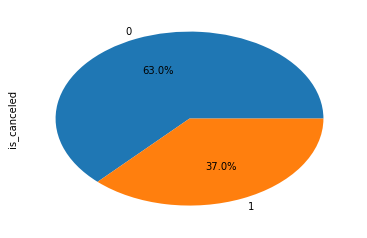

In [15]:
df['is_canceled'].value_counts().plot(kind='pie',autopct='%1.1f%%')

37% customers have cancelled their bookings. we see that our data in imbalanced

In [35]:
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'adults', u'children', u'babies', u'meal',
       u'country', u'market_segment', u'distribution_channel',
       u'is_repeated_guest', u'previous_cancellations',
       u'previous_bookings_not_canceled', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type', u'agent',
       u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'reservation_status_date'],
      dtype='object')

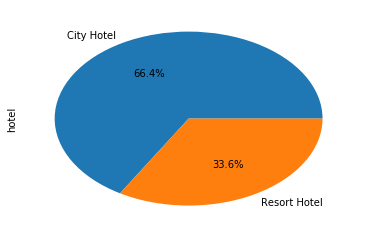

In [37]:
# Hotel feature count and distribution across 0 and 1 class 
df['hotel'].value_counts().plot(kind='pie',autopct='%1.1f%%')

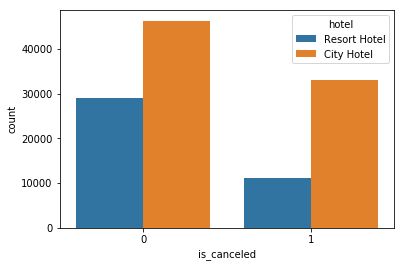

In [36]:
sns.countplot(x='is_canceled',hue='hotel',data=df)

As data has higher city hotel reservation data points compared to resort, above observation is on par with  same trend

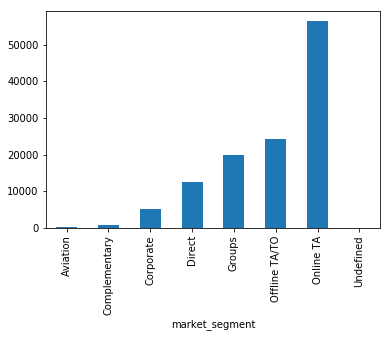

In [38]:
#market segments
df.groupby(['market_segment'])['is_canceled'].count().plot(kind='bar')

## Feature Engineering

1. Derive new features using existing features
2. Remove irrelevant features
3. Transform existing features
4. Encoding categorical variables

In [6]:
#Let us add weekend stay and weekday stay days to get total days of stay
df['total_days'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
# drop the weekend stay and weekday stay days features
df = df.drop('stays_in_week_nights',axis=1).drop('stays_in_weekend_nights',axis=1)

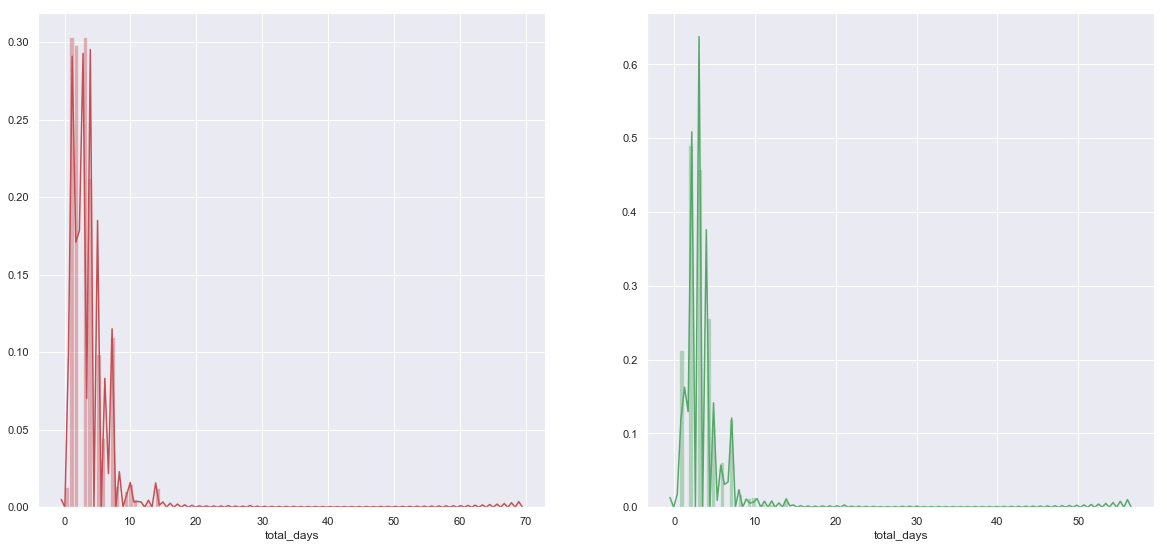

In [62]:
from pylab import *
df_0=df[(df['is_canceled']==0)]
df_1=df[df['is_canceled']==1]
sns.set(rc={"figure.figsize": (20, 20)})
subplot(2,2,1)
ax = sns.distplot(df_0['total_days'], bins=100, color='r')
subplot(2,2,2)
ax=sns.distplot(df_1['total_days'], bins=100, color='g')

Customers who have canaclled had longer stay duration than the rest

In [7]:
#Total customers
df['total_customers'] = df['adults'] + df['children']+df['babies']
df = df.drop('adults',axis=1).drop('children',axis=1).drop('babies',axis=1)

In [8]:
df = df.drop(['reservation_status_date'],axis=1)

In [9]:
len(df['agent'].unique()) # 334 unique values - Large number of unique agents and it is categorical, difficult to encode
df = df.drop('agent',axis=1)

In [10]:
len(df['country'].unique()) # 178 countries
df = df.drop('country',axis=1)

In [11]:
# df['previous_bookings_not_canceled'].value_counts() # We observe that most data has value = 0; hence we drop the feature
# df.groupby(['is_canceled'])['previous_bookings_not_canceled'].value_counts() # We observe that data distribution across both class is remains same
df = df.drop('previous_bookings_not_canceled',axis=1)

In [12]:
# df['previous_cancellations'].value_counts().plot('bar') 
# df.groupby(['is_canceled'])['previous_cancellations'].value_counts()
df = df.drop('previous_cancellations',axis=1)

In [13]:
len(df.columns)

23

In [14]:
backup = df.copy()

In [15]:
#Custom encoding
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, \
                                                         'April':4, 'May':5, 'June':6, 'July':7,\
                                                         'August':8, 'September':9, 'October':10, \
                                                         'November':11, 'December':12})

In [16]:
encode = LabelEncoder()

In [154]:
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'meal', u'market_segment',
       u'distribution_channel', u'is_repeated_guest', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type',
       u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'total_customers'],
      dtype='object')

In [17]:
cat_col=['hotel','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type','reservation_status']
for i in cat_col:
    df[i] = encode.fit_transform(df[i])

In [18]:
df[cat_col].head()

,hotel,arrival_date_year,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,1,0,0,3,1,2,2,0,2,1
1,1,0,0,3,1,2,2,0,2,1
2,1,0,0,3,1,0,2,0,2,1
3,1,0,0,2,0,0,0,0,2,1
4,1,0,0,6,3,0,0,0,2,1


### Feature correlation
<b>Spearman</b> and <b>Pearson</b> are the 2 statistical methods to compute the correlation between features. 
- Pearson is suggested method for features with continuous values and linear relationship
- Spearman is suggested method when features have ordinal categorical data or non-linear relationship
<br>Pandas correlation method by default uses Pearson method, but we can also change it to spearman </br>

In [104]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_days,total_customers
is_canceled,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.017678,0.059338,0.167600,-0.084793,...,-0.144381,0.468634,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,0.017779,0.046506
lead_time,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.000349,0.013797,0.220414,-0.124410,...,0.000149,0.375667,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,0.157167,0.072279
arrival_date_year,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.065840,0.107697,0.022644,0.010341,...,0.030872,-0.064714,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.031438,0.052152
arrival_date_month,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,-0.015205,0.001293,0.007381,-0.030729,...,0.004809,0.004048,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.021536,0.027246
arrival_date_week_number,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,-0.017381,-0.000510,0.005699,-0.030131,...,0.005508,0.003891,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.018719,0.025216
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.007086,-0.004088,0.001578,-0.006145,...,0.010613,-0.001358,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,-0.027408,0.006758
meal,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,1.000000,0.145132,0.116957,-0.057009,...,0.024650,-0.092151,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,0.045277,-0.005968
market_segment,0.059338,0.013797,0.107697,0.001293,-0.000510,-0.004088,0.145132,1.000000,0.767751,-0.250286,...,-0.071818,-0.184847,-0.041503,-0.165814,0.232763,-0.062226,0.274373,-0.061584,0.126052,0.213210
distribution_channel,0.167600,0.220414,0.022644,0.007381,0.005699,0.001578,0.116957,0.767751,1.000000,-0.263219,...,-0.113601,0.092580,0.048642,-0.069640,0.092396,-0.132280,0.098815,-0.171330,0.101407,0.144344
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.030729,-0.030131,-0.006145,-0.057009,-0.250286,-0.263219,1.000000,...,0.012092,-0.057502,-0.022235,-0.017111,-0.134314,0.077090,0.013050,0.083504,-0.106626,-0.136747


In [173]:
feat_corr['deposit_type'].sort_values()

reservation_status            -0.466185
total_of_special_requests     -0.266672
assigned_room_type            -0.242384
reserved_room_type            -0.199689
market_segment                -0.184847
booking_changes               -0.112153
total_days                    -0.100809
meal                          -0.092151
required_car_parking_spaces   -0.090929
adr                           -0.089838
total_customers               -0.079277
customer_type                 -0.076404
arrival_date_year             -0.064714
is_repeated_guest             -0.057502
arrival_date_day_of_month     -0.001358
arrival_date_week_number       0.003891
arrival_date_month             0.004048
distribution_channel           0.092580
days_in_waiting_list           0.121017
lead_time                      0.375667
is_canceled                    0.468634
deposit_type                   1.000000
Name: deposit_type, dtype: float64

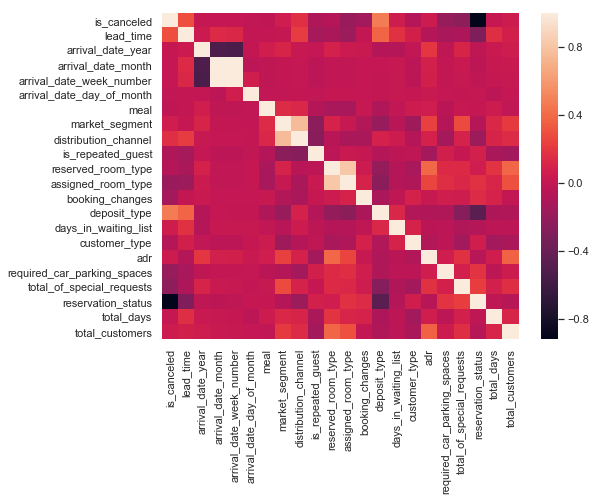

In [105]:
plt.figure(figsize=(8,6))
feat_corr = df.corr()
sns.heatmap(feat_corr)

The diagonal shows correlation of each feature with itself, hence indicates highest correlation.
Using the table and plot we observe that few features have veryhigh correlation
Ex:- 
1. Arrival_date_year and arrival_date_month = -0.52
2. Reservation_status and deposit type = -0.46 
3. market_segment vs distribution_channel = 0.76
4. reserved_room_type vs assigned_room_type = 0.81

It is advisable to remove one of the features from the high correlation pair, but we will reatin them and see the effect on performance

In [107]:
feat_corr['is_canceled'].sort_values()

reservation_status            -0.917196
total_of_special_requests     -0.234658
required_car_parking_spaces   -0.195498
assigned_room_type            -0.176028
booking_changes               -0.144381
is_repeated_guest             -0.084793
customer_type                 -0.068140
reserved_room_type            -0.061282
meal                          -0.017678
arrival_date_day_of_month     -0.006130
arrival_date_week_number       0.008148
arrival_date_month             0.011022
arrival_date_year              0.016660
total_days                     0.017779
total_customers                0.046506
adr                            0.047557
days_in_waiting_list           0.054186
market_segment                 0.059338
distribution_channel           0.167600
lead_time                      0.293123
deposit_type                   0.468634
is_canceled                    1.000000
Name: is_canceled, dtype: float64

The reservation_status has high correlation with is_canceled. For iteration 1, lets retain the feature.

## Implementing gaussian NB classifier

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian. <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">sklearn documentation</a>

In [ ]:
df=df.fillna(0)

In [157]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [158]:
classifier2 = GaussianNB()
classifier2.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [159]:
y_pred2 = classifier2.predict(X_test)
y_prob2 = classifier2.predict_proba(X_test)

In [248]:
y_pred2[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [249]:
y_prob2[:10]

array([[1.00000000e+00, 6.65718908e-15],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999922e-01, 7.81161306e-08],
       [9.95280801e-01, 4.71919871e-03],
       [9.90641807e-01, 9.35819344e-03],
       [9.90733478e-01, 9.26652225e-03],
       [0.00000000e+00, 1.00000000e+00],
       [9.97121027e-01, 2.87897322e-03],
       [9.99661861e-01, 3.38138590e-04],
       [9.88366240e-01, 1.16337599e-02]])

## Evaluation metric
<b> Precission and Recall </b>


<img src="img/PR diagram1.PNG" width="200p"/>
<img src="img/PR diagram 2.PNG" width="400"/>


<br><b> Confusion Matrix </b>
<img src="img/Confusion matrix.PNG" width="200"/>

In [160]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred2)) 
print("recall score: ", recall_score(y_test,y_pred2))
print("precision score: ", precision_score(y_test,y_pred2))
print("f1 score: ", f1_score(y_test,y_pred2))
print("accuracy score: ", accuracy_score(y_test,y_pred2))

('test-set confusion matrix:\n', array([[22215,   263],
       [    0, 13339]], dtype=int64))
('recall score: ', 1.0)
('precision score: ', 0.9806646081458609)
('f1 score: ', 0.9902379273226681)
('accuracy score: ', 0.9926571181282631)


Looks like this model predicts most data points correct. 

### Model 2 - 
Remove the feature that is highly correlated with target feature
<br>
<b>Reservation_status</b> has high correlation with is_canceled. Looking at the values in column reveals that canceled is a reservation type. This might be causing data leak. Hence we will delete this feature

In [109]:
backup['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [19]:
df = df.drop('reservation_status',axis=1)

In [20]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

('test-set confusion matrix:\n', array([[ 7555, 14923],
       [ 1203, 12136]], dtype=int64))
('recall score: ', 0.9098133293350326)
('precision score: ', 0.4485014228168077)
('f1 score: ', 0.6008218228625178)
('accuracy score: ', 0.5497668704804981)


### Model 3 - 
Let us remove 1 feature from the correlated feature pair
1. Arrival_date_year and arrival_date_month = -0.52
2. Reservation_status and deposit type = -0.46 
3. market_segment vs distribution_channel = 0.76
4. reserved_room_type vs assigned_room_type = 0.81

In [178]:
df1=df.copy()
df = df.drop('arrival_date_month',axis=1)
df = df.drop('market_segment',axis=1)
df = df.drop('reserved_room_type',axis=1)

In [180]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [183]:
y_pred3 = classifier3.predict(X_test)
y_prob3 = classifier3.predict_proba(X_test)
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred3)) 
print("recall score: ", recall_score(y_test,y_pred3))
print("precision score: ", precision_score(y_test,y_pred3))
print("f1 score: ", f1_score(y_test,y_pred3))
print("accuracy score: ", accuracy_score(y_test,y_pred3))

('test-set confusion matrix:\n', array([[ 7164, 15314],
       [ 1112, 12227]], dtype=int64))
('recall score: ', 0.9166354299422745)
('precision score: ', 0.44395628335935516)
('f1 score: ', 0.5981898238747555)
('accuracy score: ', 0.5413909596001899)


In practice, even though Naive Bayes assumption of independent features is violated, there is no significant impact on model performance

## Implementing Bernoulli NB classifier


Bernoulli NB classifier works on discrete data with Binary or boolean features. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB">sklearn documentation</a>

In [22]:
d1 = backup[['hotel','is_canceled','arrival_date_year','arrival_date_month','meal','market_segment',\
          'distribution_channel','reserved_room_type','deposit_type','customer_type','is_repeated_guest']]

In [218]:
d1.columns

Index([u'hotel', u'is_canceled', u'arrival_date_year', u'arrival_date_month',
       u'meal', u'market_segment', u'distribution_channel',
       u'reserved_room_type', u'deposit_type', u'customer_type',
       u'is_repeated_guest'],
      dtype='object')

In [23]:
# We do one-hot encoding for the features to get binary columns
cat_col=['hotel','arrival_date_year','arrival_date_month','meal','market_segment',\
          'distribution_channel','reserved_room_type','deposit_type','customer_type','is_repeated_guest']
d2=pd.get_dummies(data=d1,columns=cat_col)

In [222]:
d1.head(1)

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,is_repeated_guest
0,Resort Hotel,0,2015,July,BB,Direct,Direct,C,No Deposit,Transient,0


In [221]:
d2.head(1)

,is_canceled,hotel_City Hotel,hotel_Resort Hotel,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,...,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_0,is_repeated_guest_1
0,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [24]:
y = d2["is_canceled"]
X = d2.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
classifier4 = BernoulliNB()
classifier4.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
y_pred4 = classifier4.predict(X_test)
y_prob4=classifier4.predict_proba(X_test)
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred4)) 
print("recall score: ", recall_score(y_test,y_pred4))
print("precision score: ", precision_score(y_test,y_pred4))
print("f1 score: ", f1_score(y_test,y_pred4))
print("accuracy score: ", accuracy_score(y_test,y_pred4))

('test-set confusion matrix:\n', array([[21379,  1099],
       [ 8158,  5181]], dtype=int64))
('recall score: ', 0.3884099257815428)
('precision score: ', 0.825)
('f1 score: ', 0.5281614761200877)
('accuracy score: ', 0.7415473099366223)


In [28]:
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_prob4[:,1])
roc_auc4 = auc(false_positive_rate4, true_positive_rate4)

In [30]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5,0,'False Positive Rate')

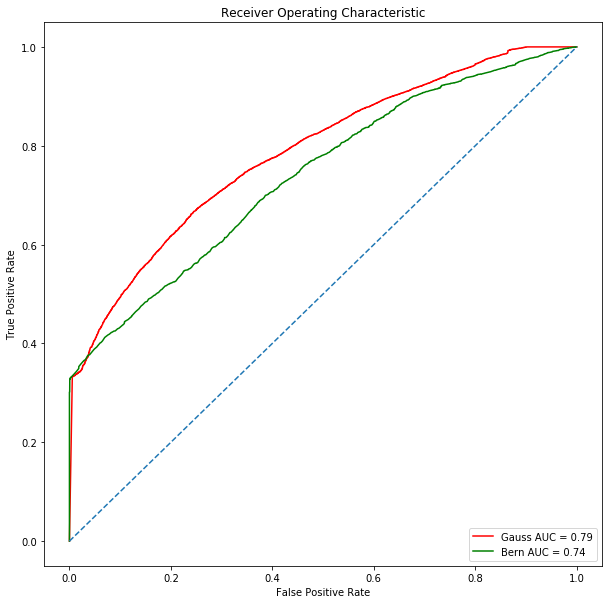

In [31]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'Gauss AUC = %0.2f' % roc_auc)
plt.plot(false_positive_rate4, true_positive_rate4, color = 'green', label = 'Bern AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')